<a href="https://colab.research.google.com/github/CVerka/Homework/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import ElasticNet,Lasso,Ridge
from sklearn.model_selection import KFold,cross_val_score
#load dataset
diabetes_data = load_diabetes()
diabetes_data.data.shape
diabetes_data.target.shape
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
#create dataframe
diabetes_df = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)
#set the max digits after decimal point
pd.set_option('display.precision',4 )
#max columns
pd.set_option('display.max_columns',11)
#character width
pd.set_option('display.width',None)
#set target
diabetes_df['target'] = diabetes_data.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


In [ ]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-2.5118e-19,1.2308e-17,-2.2456e-16,-4.7976e-17,-1.3815e-17,3.9184e-17,-5.7772e-18,-9.0425e-18,9.2937e-17,1.1303e-17,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,-1.2678e-01,-1.1561e-01,-1.0231e-01,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,-3.4248e-02,-3.0358e-02,-3.5117e-02,-3.9493e-02,-3.3246e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6704e-03,-4.3209e-03,-3.8191e-03,-6.5845e-03,-2.5923e-03,-1.9472e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,2.8358e-02,2.9844e-02,2.9312e-02,3.4309e-02,3.2432e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,1.5391e-01,1.9879e-01,1.8118e-01,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


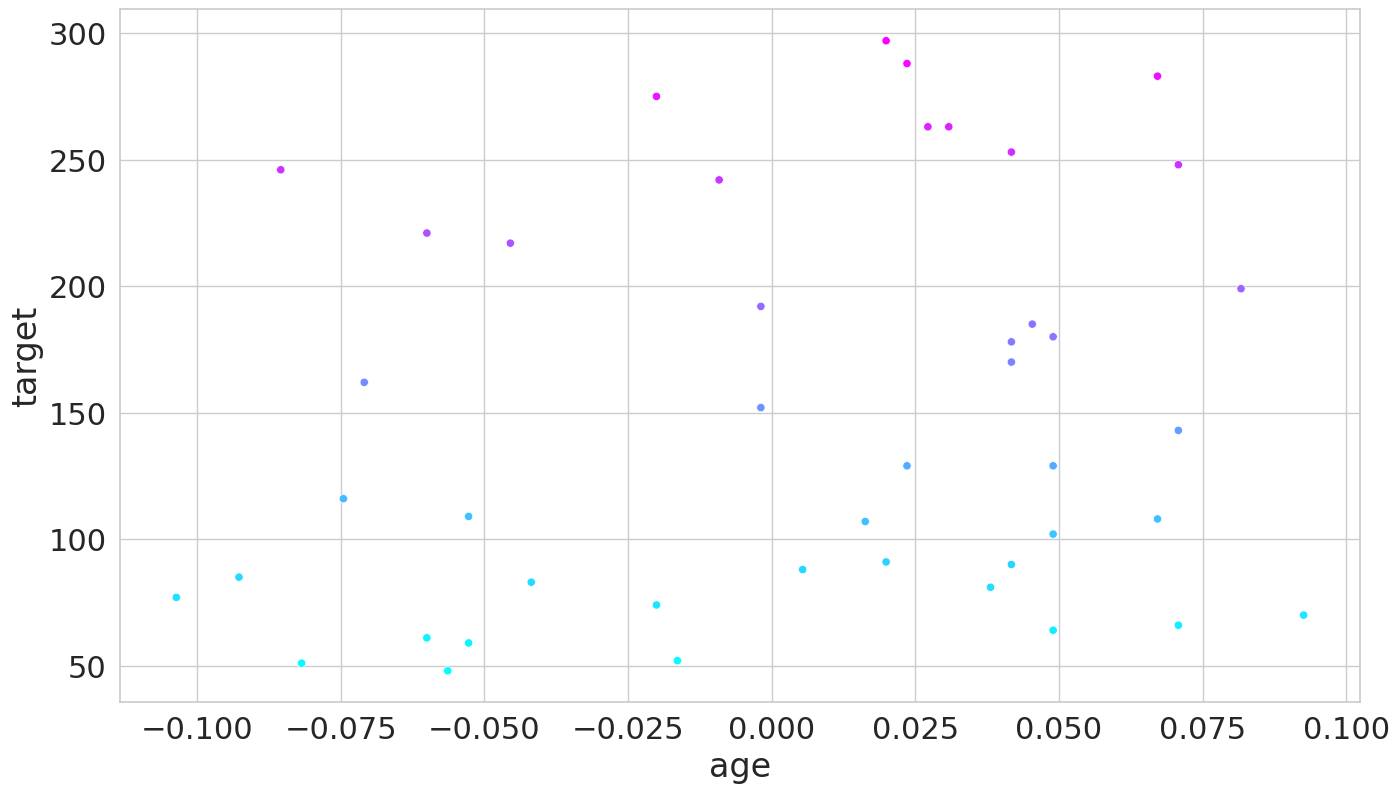

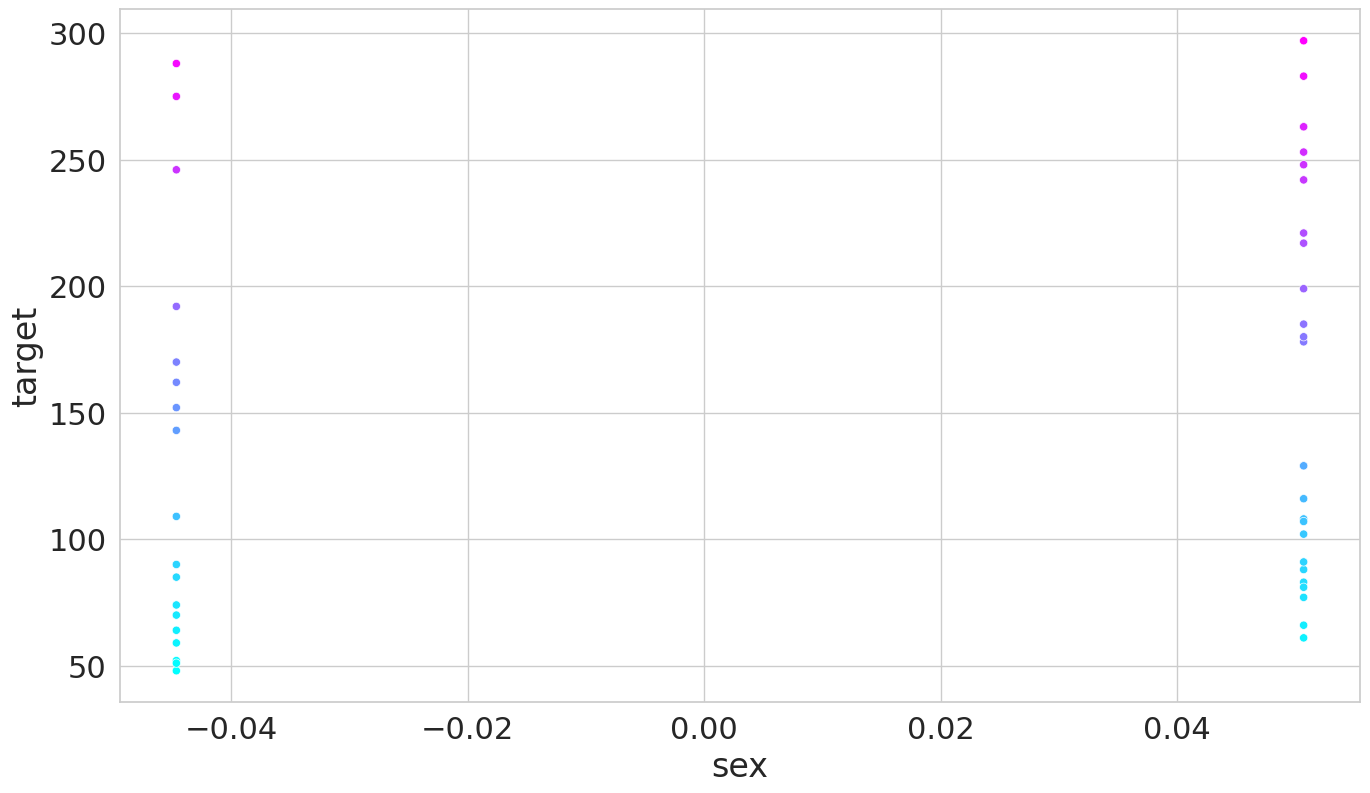

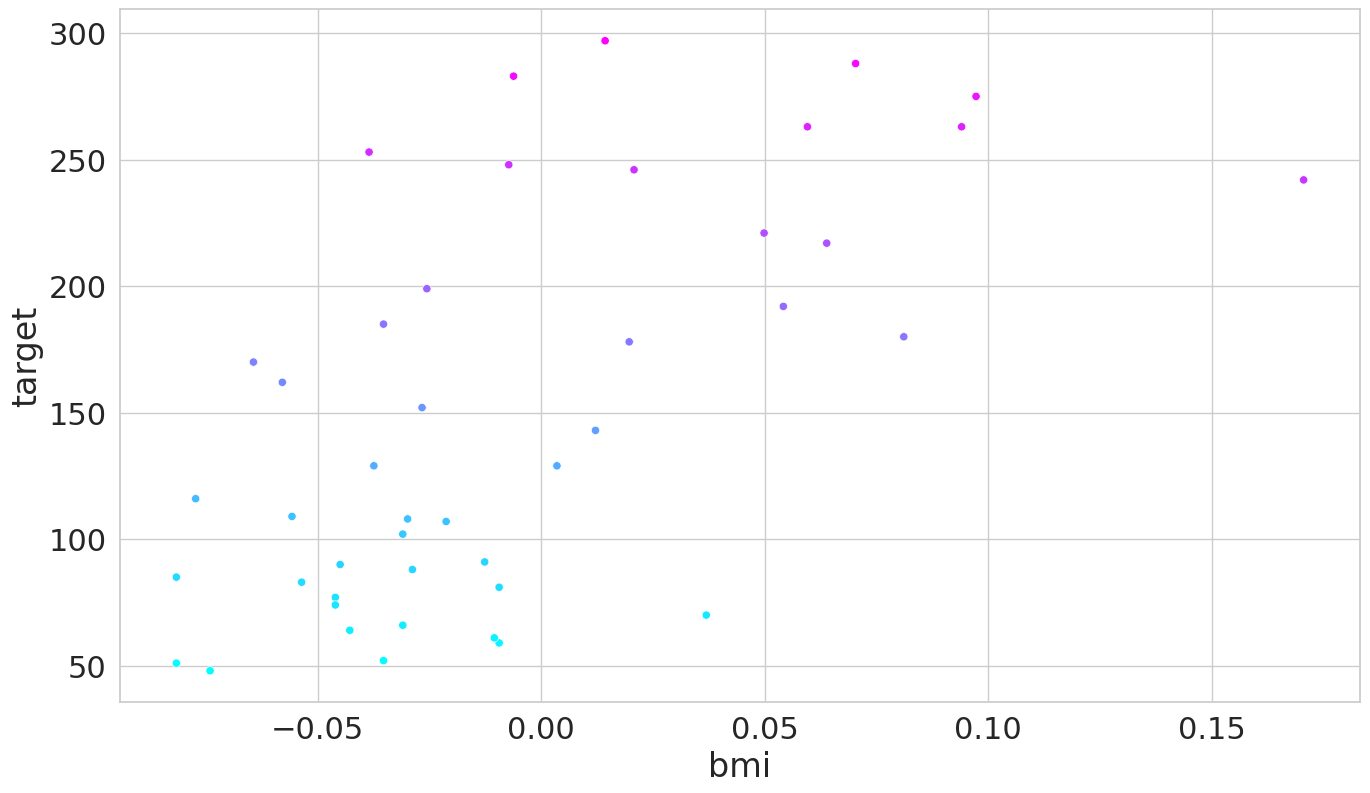

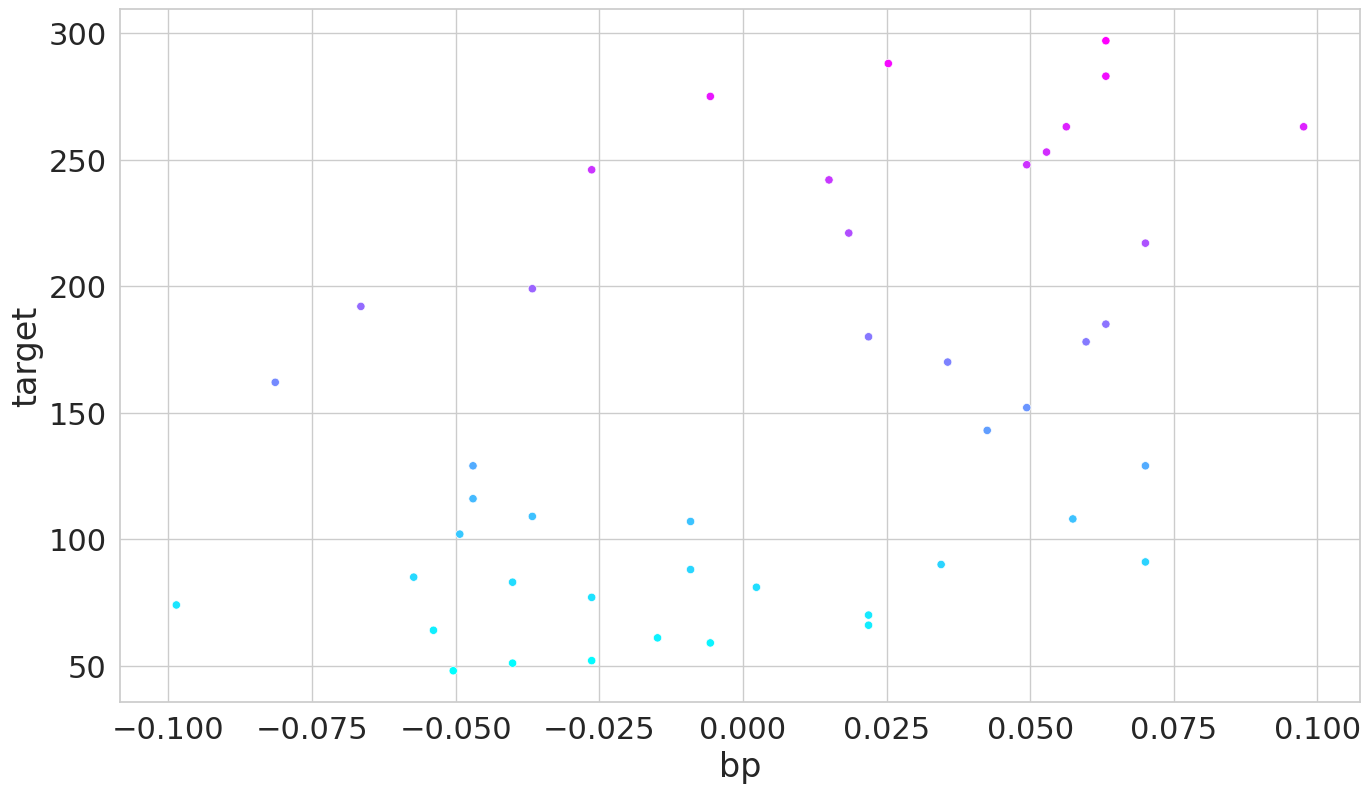

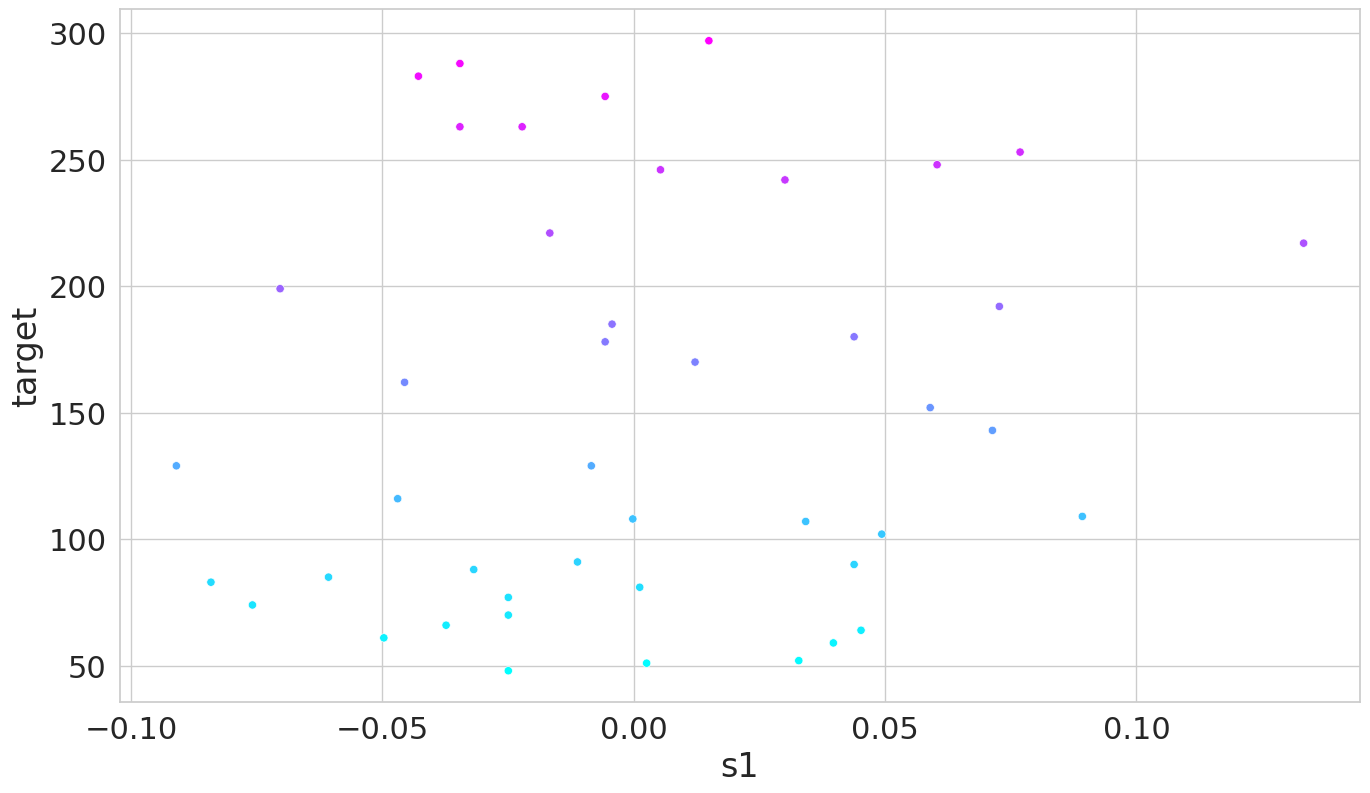

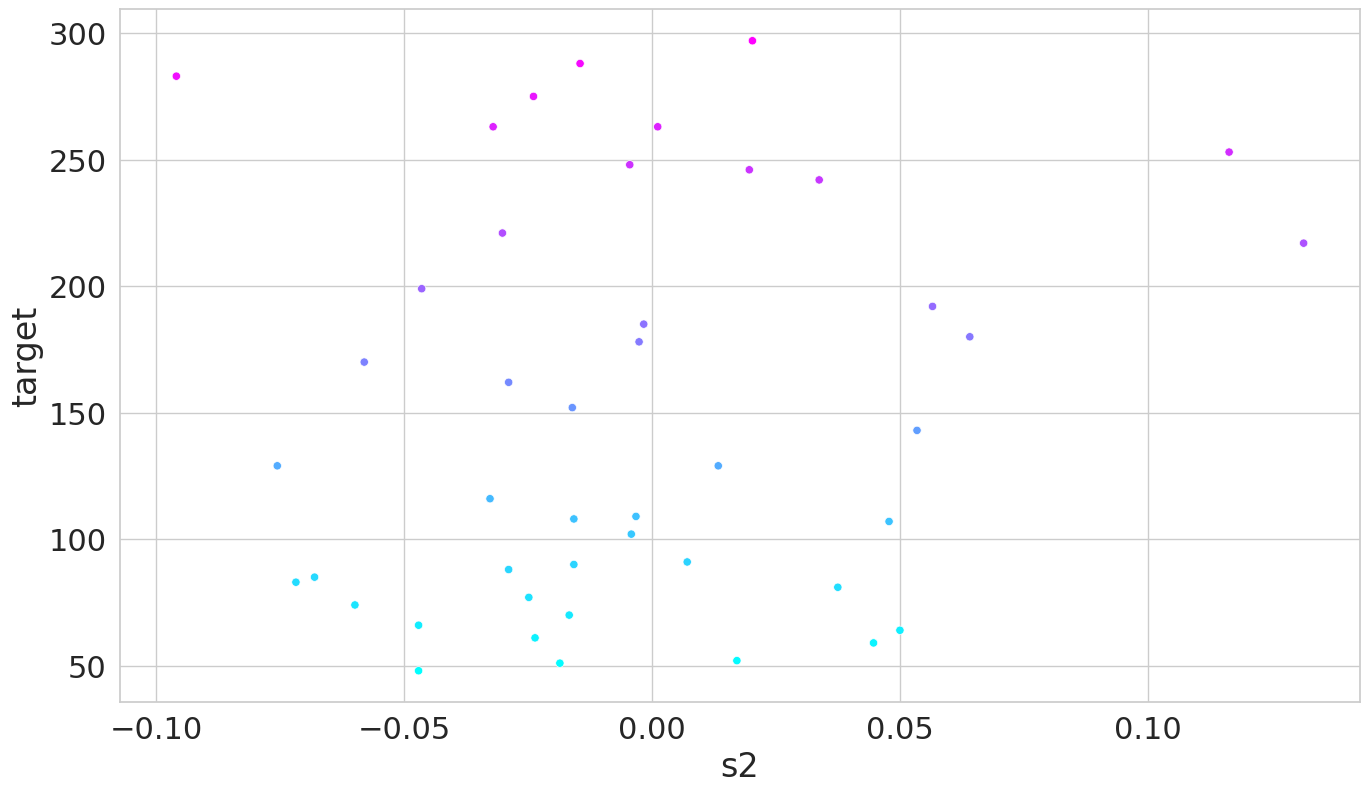

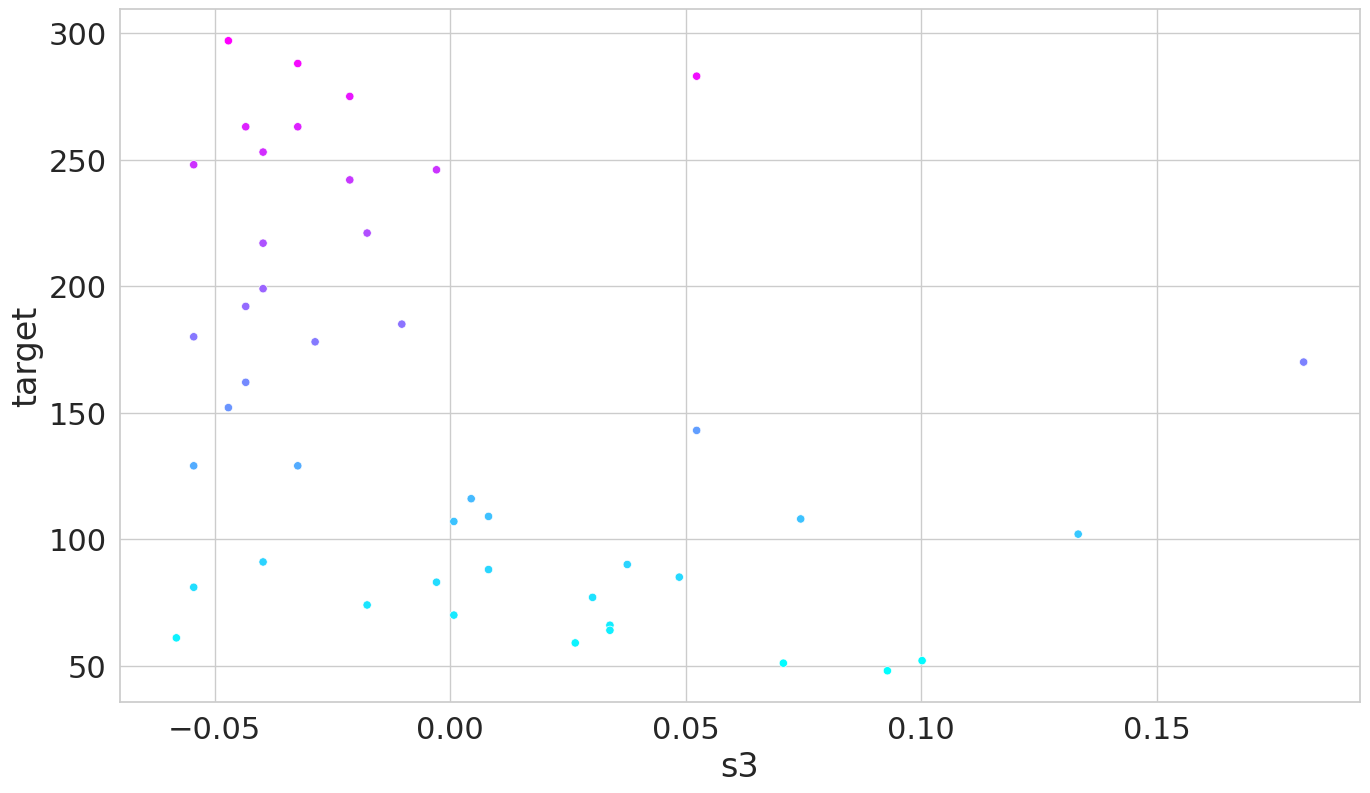

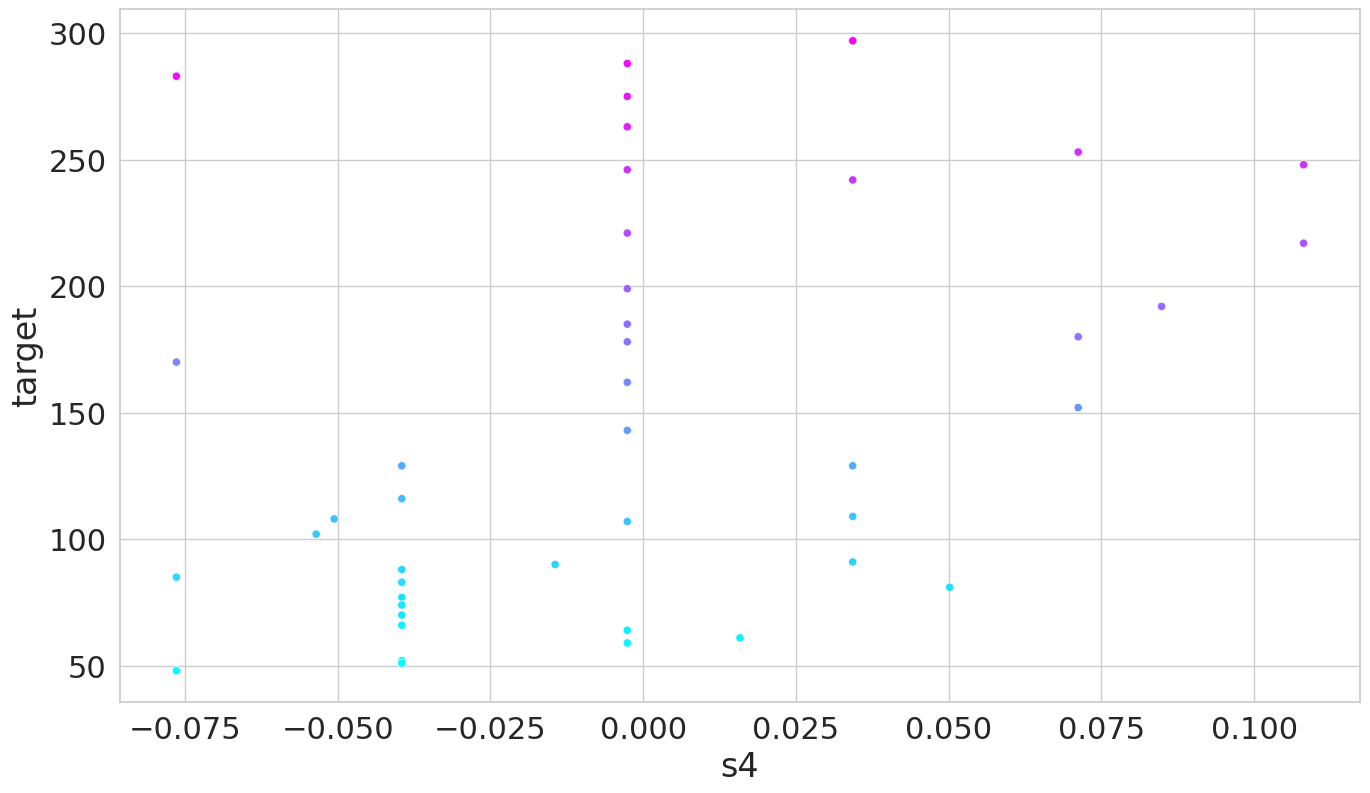

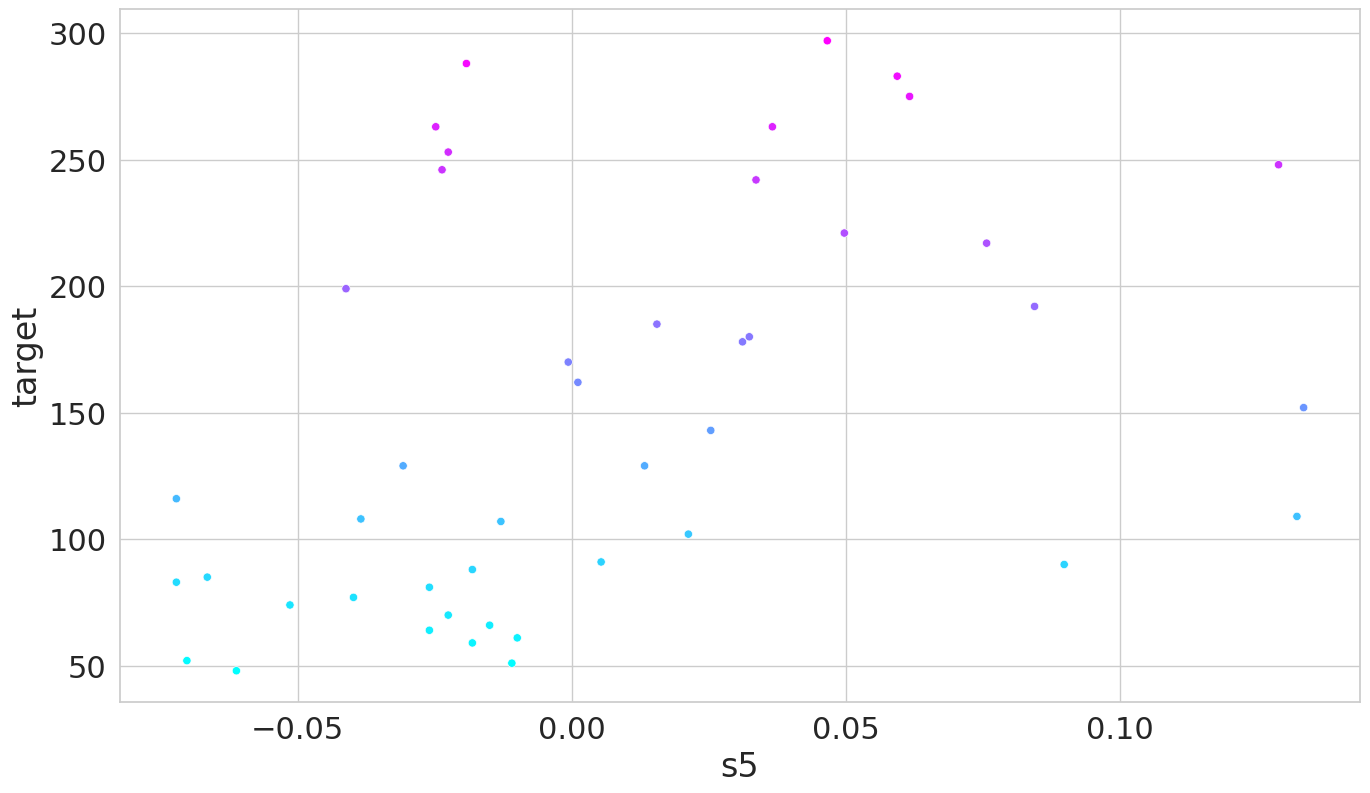

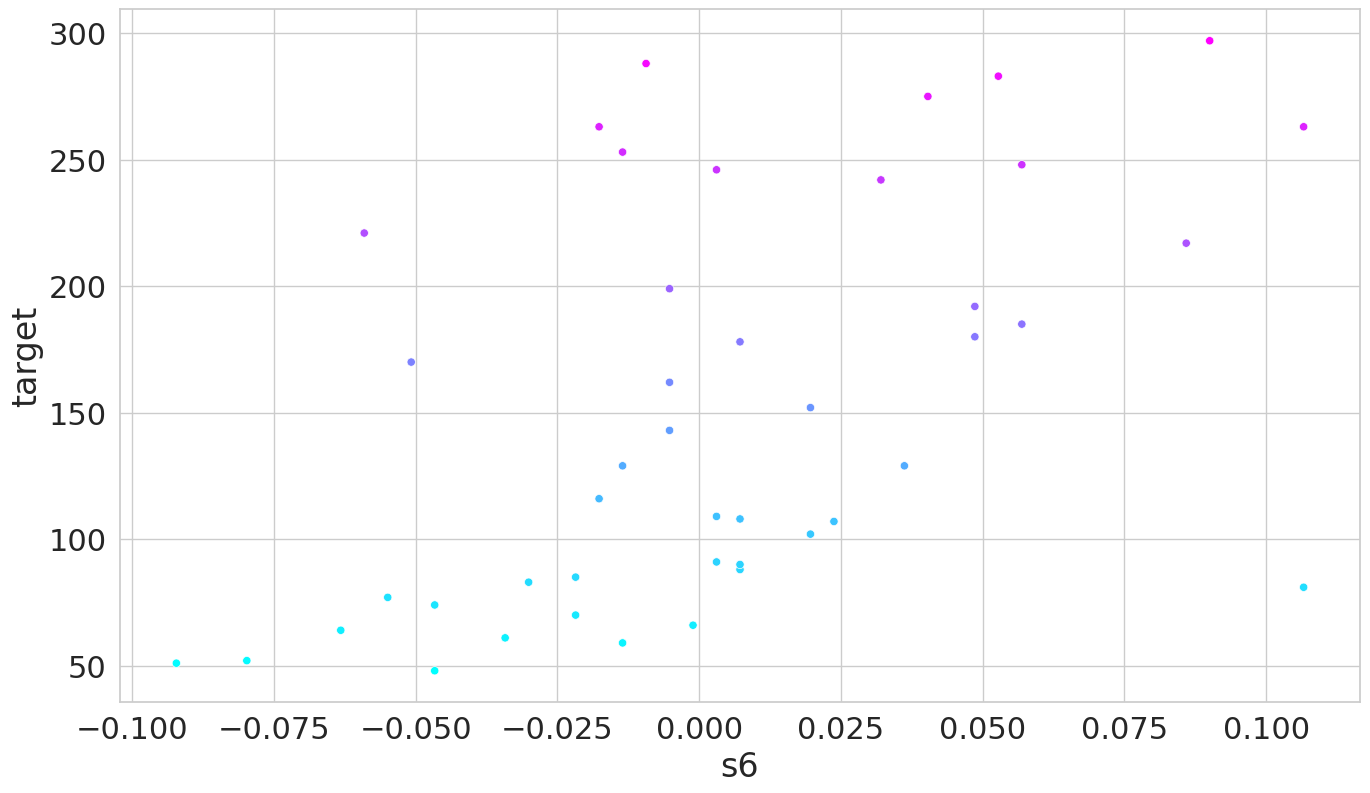

In [ ]:
#sample dataframe from 10% of data
sample_df = diabetes_df.sample(frac=0.1,random_state=17)
sns.set(font_scale=2)
sns.set_style('whitegrid')
#display scatterplots showing each feature correlated with the target value
for feature in diabetes_data.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=sample_df,x=feature,y='target',hue='target',palette='cool',legend=False)

In [ ]:
#create training and testing sets
X_train,X_test,y_train,y_test = train_test_split(diabetes_df,diabetes_df.target,random_state=11)
X_train.shape
X_test.shape
#linear regression estimator
linear_regression = LinearRegression()
#fit the model
linear_regression.fit(X=X_train,y=y_train)
for i, name in enumerate(diabetes_data.feature_names):
    print(name,linear_regression.coef_[i])
#find intercept
linear_regression.intercept_

age -1.104068929740426e-15
sex 1.7963408538435033e-13
bmi -1.772193503057906e-14
bp -1.8200827130165909e-13
s1 -1.1535128321277233e-12
s2 9.618998306204496e-13
s3 6.32866616100472e-13
s4 1.4860703813346365e-13
s5 2.516036424343726e-13
s6 -5.6615953245020556e-14


2.842170943040401e-14

In [ ]:
#testing the model
predicted = linear_regression.predict(X_test)
expected = y_test
#5 predicted and 5 expected values
predicted[:5]
expected[:5]

,target
189,79.0
294,55.0
318,109.0
146,178.0
201,39.0


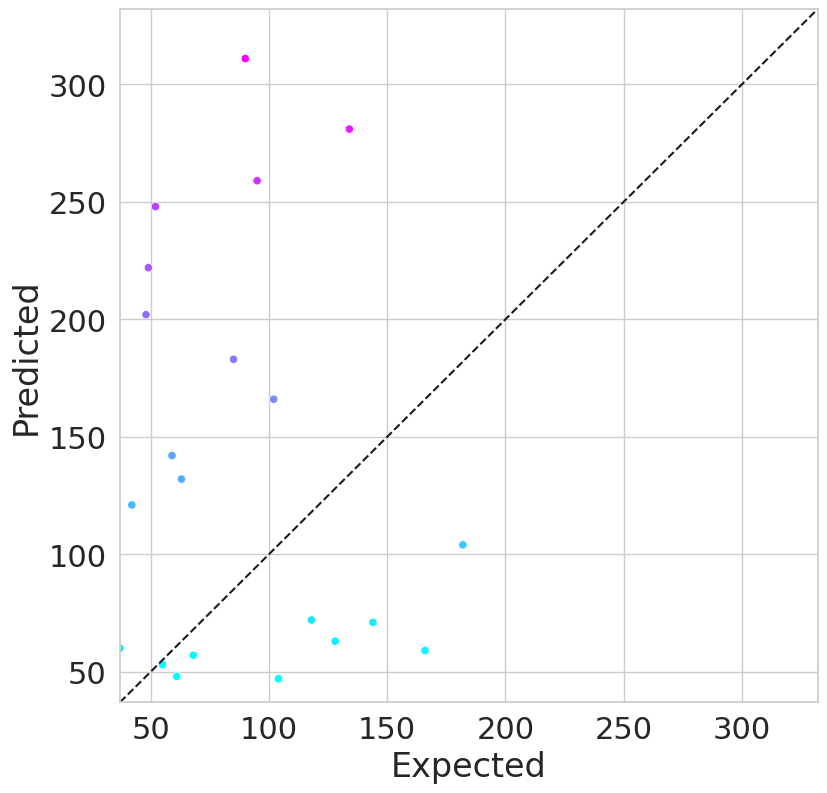

In [ ]:
#new datafram to contain expected and predicted columns
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
#scatterplot the data
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df, x='Expected',y='Predicted',hue='Predicted', palette='cool', legend=False)
start = min(expected.min(),predicted.min())
end = max(expected.max(),predicted.max())
axes.set_xlim(start,end)
axes.set_ylim(start,end)
line = plt.plot([start,end],[start,end],'k--')

In [ ]:
#testing 2 different metrics, r2_score returns a value of 1.0 making it the better option
metrics.r2_score(expected,predicted)
metrics.mean_squared_error(expected,predicted)

1.124816154875135e-27

In [ ]:
#testing different models to see which is best for the data
estimators={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'ElasticNet':ElasticNet()
}
for estimator_name,estimator_object in estimators.items():
    kfold = KFold(n_splits=10,random_state=11,shuffle=True)
    score = cross_val_score(estimator=estimator_object,X=diabetes_df,y=diabetes_df.target,cv=kfold,scoring='r2')
    print(f'{estimator_name} mean of r2 = {score.mean():.3f}')

LinearRegression mean of r2 = 1.000
Ridge mean of r2 = 1.000
Lasso mean of r2 = 1.000
ElasticNet mean of r2 = 1.000
